# Lecture 7 - CME 193 - scikit-learn

[Scikit-learn](https://scikit-learn.org/stable/) is a library that allows you to do machine learning, that is, make predictions from data, in Python. There are four basic machine learning tasks:

 1. Regression: predict a number from datapoints, given datapoints and corresponding numbers
 2. Classification: predict a category from datapoints, given datapoints and corresponding numbers
 3. Clustering: predict a category from datapoints, given only datapoints
 4. Dimensionality reduction: make datapoints lower-dimensional so that we can visualize the data

Here is a [handy flowchart](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) of when to use each technique.

![](https://scikit-learn.org/stable/_static/ml_map.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
from sklearn import datasets

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
import sklearn.metrics as metrics

## Regression
Abalone are a type of edible marine snail, and they have internal rings that correspond to their age (like trees). In the following, we will use a dataset of [abalone measurements](https://archive.ics.uci.edu/ml/datasets/abalone). It has the following fields:

    Sex / nominal / -- / M, F, and I (infant) 
    Length / continuous / mm / Longest shell measurement 
    Diameter	/ continuous / mm / perpendicular to length 
    Height / continuous / mm / with meat in shell 
    Whole weight / continuous / grams / whole abalone 
    Shucked weight / continuous	/ grams / weight of meat 
    Viscera weight / continuous / grams / gut weight (after bleeding) 
    Shell weight / continuous / grams / after being dried 
    Rings / integer / -- / +1.5 gives the age in years 

Suppose we are interested in predicting the age of the abalone given their measurements. This is an example of a regression problem.

In [6]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',
                    header=None, names=['sex', 'length', 'diameter', 'height',
                                        'weight', 'shucked_weight',
                                        'viscera_weight', 'shell_weight', 'rings'])

In [7]:
df.head()

,sex,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
df.describe()

,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


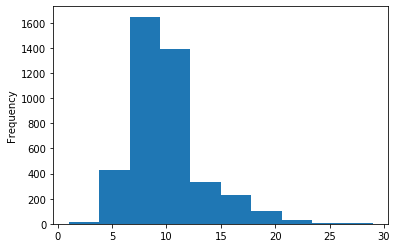

In [9]:
df['rings'].plot(kind='hist');

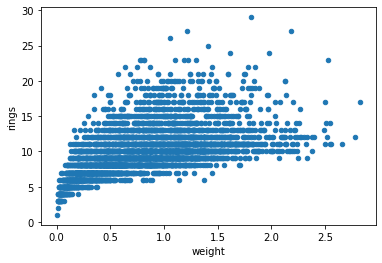

In [10]:
df.plot('weight', 'rings', kind='scatter');

In [11]:
X = df[['weight']].to_numpy()
y = df['rings'].to_numpy()

In [12]:
X

array([[0.514 ],
       [0.2255],
       [0.677 ],
       ...,
       [1.176 ],
       [1.0945],
       [1.9485]])

In [13]:
y

array([15,  7,  9, ...,  9, 10, 12], dtype=int64)

In [14]:
model = linear_model.LinearRegression()
model.fit(X,y)
print(model.coef_, model.intercept_)

[3.55290921] 6.989238807755703


In [15]:
print(model.score(X, y))

0.29202100292591804


In [16]:
model.predict(np.array([[1.5], [2.2]]))

array([12.31860263, 14.80563908])

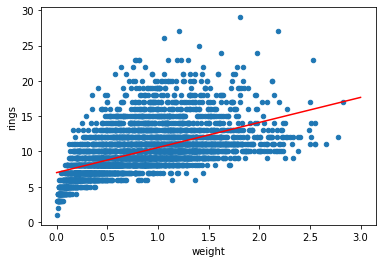

In [17]:
df.plot('weight', 'rings', kind='scatter')

weight = np.linspace(0, 3, 10).reshape(-1, 1)
plt.plot(weight, model.predict(weight), 'r')

In [18]:
df['root_weight'] = np.sqrt(df['weight'])

In [19]:
X = df[['weight', 'root_weight']].to_numpy()
y = df['rings'].to_numpy()
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
weight = np.linspace(0, 3, 100).reshape(-1, 1)
root_weight = np.sqrt(weight)

features = np.hstack((weight, root_weight))

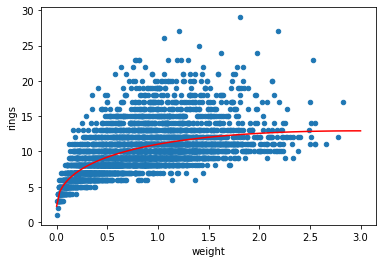

In [21]:
df.plot('weight', 'rings', kind='scatter')

plt.plot(weight, model.predict(features), 'r')

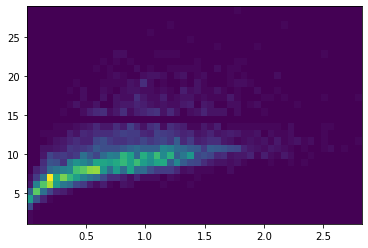

In [22]:
plt.hist2d(df['weight'], df['rings'], bins=(50, 30));

## Classification

Another example of a machine learning problem is classification. Here we will use a dataset of flower measurements from three different flower species of *Iris* (*Iris setosa*, *Iris virginica*, and *Iris versicolor*). We aim to predict the species of the flower. Because the species is not a numerical output, it is not a regression problem, but a classification problem.

In [23]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [24]:
X = iris.data[:, :2]
y = iris.target_names[iris.target]

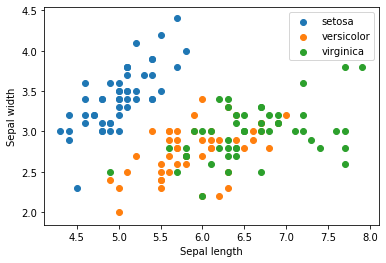

In [25]:
for name in iris.target_names:
    plt.scatter(X[y == name, 0], X[y == name, 1], label=name)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend();

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 2) (120,)
(30, 2) (30,)


In [27]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
X_test

array([[5.8, 2.8],
       [6. , 2.2],
       [5.5, 4.2],
       [7.3, 2.9],
       [5. , 3.4],
       [6.3, 3.3],
       [5. , 3.5],
       [6.7, 3.1],
       [6.8, 2.8],
       [6.1, 2.8],
       [6.1, 2.6],
       [6.4, 3.2],
       [6.1, 2.8],
       [6.5, 2.8],
       [6.1, 2.9],
       [4.9, 3.6],
       [6. , 2.9],
       [5.5, 2.6],
       [4.8, 3. ],
       [5.4, 3.9],
       [5.6, 2.8],
       [5.6, 3. ],
       [4.8, 3.4],
       [4.4, 2.9],
       [6.2, 2.8],
       [4.6, 3.6],
       [5.1, 3.8],
       [6.2, 2.9],
       [5. , 2.3],
       [5. , 3.4]])

In [29]:
model.predict(X_test)

array(['versicolor', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'versicolor', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'virginica',
       'setosa', 'setosa', 'virginica', 'versicolor', 'setosa'],
      dtype='<U10')

## Evaluating your model

In [30]:
np.mean(model.predict(X_test) == y_test)  # Accuracy

0.6666666666666666

In [31]:
metrics.accuracy_score(model.predict(X_test), y_test)

0.6666666666666666

In [32]:
print(metrics.classification_report(model.predict(X_test), y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.38      0.71      0.50         7
   virginica       0.67      0.33      0.44        12

    accuracy                           0.67        30
   macro avg       0.68      0.68      0.65        30
weighted avg       0.72      0.67      0.66        30



In [33]:
# Cross validation
from sklearn.model_selection import cross_val_score
model = KNeighborsClassifier()
scores = cross_val_score(model, X, y, cv=5)
scores

array([0.7       , 0.76666667, 0.73333333, 0.86666667, 0.76666667])

In [34]:
print(f"Accuracy: {scores.mean()} (+/- {scores.std()})")

Accuracy: 0.7666666666666667 (+/- 0.05577733510227173)


### Use Full data

In [35]:
X = iris.data
y = iris.target_names[iris.target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(metrics.classification_report(model.predict(X_test), y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



# 1. Exercise
Try to fit some of the models in the following cell to the same data. Compute the relevant statistics (e.g. accuracy, precision, recall). Look up the documentation for the classifier, and see if the classifier takes any parameters. How does changing the parameter affect the result?

In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [37]:
X = iris.data
y = iris.target_names[iris.target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(metrics.classification_report(model.predict(X_test), y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Clustering

Clustering is useful if we don't have a dataset labelled with the categories we want to predict, but we nevertheless expect there to be a certain number of categories. For example, suppose we have the previous dataset, but we are missing the labels. We can use a clustering algorithm like k-means to *cluster* the datapoints. Because we don't have labels, clustering is what is called an **unsupervised learning** algorithm.

In [38]:
X = iris.data

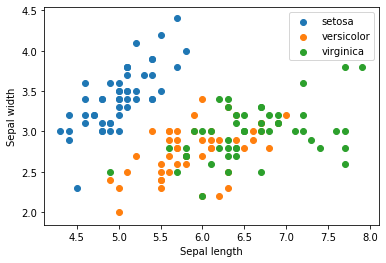

In [39]:
for name in iris.target_names:
    plt.scatter(X[y == name, 0], X[y == name, 1], label=name)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

In [40]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=0)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [41]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [42]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

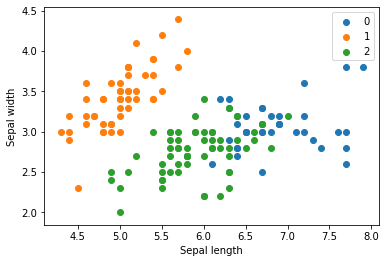

In [43]:
for name in [0, 1, 2]:
    plt.scatter(X[model.labels_ == name, 0], X[model.labels_ == name, 1], label=name)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

### Exercise

Load the breast cancer dataset. 

- Try to cluster it into two clusters and check if the clusters match with the target class from the dataset, which specifies if its malignant or not. Here we are testing if we can idenitify if its malignant or benign without even looking at the target class i.e. using unsupervised learning.

- Next, train a supervised classifier, a `DecisionTreeClassifier`, and see how much improvement we get?

In [44]:
# loading breast cancer dataset
bc = datasets.load_breast_cancer()
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [45]:
from sklearn.cluster import KMeans

# clustering into 2 clusters
unsupervised = KMeans(n_clusters=2, random_state=0)
#
unsupervised.fit(bc.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [46]:
# know beforehand that 0s in model corresponds to 1 in data
score = 1 - (sum(unsupervised.labels_ ^ (1-bc.target)))/(np.shape(bc.target)[0])
print("Unsupervised Model Score: %s" % score)

Unsupervised Model Score: 0.14586994727592262


In [47]:
supervised = DecisionTreeClassifier()
scores = cross_val_score(supervised, bc.data, bc.target, cv=5)
print("Supervised Model Score %s" % (sum(scores)/5))

Supervised Model Score 0.9226207110697097


## Dimensionality reduction

Dimensionality reduction is another unsupervised learning problem (that is, it does not require labels). It aims to project datapoints into a lower dimensional space while preserving distances between datapoints.

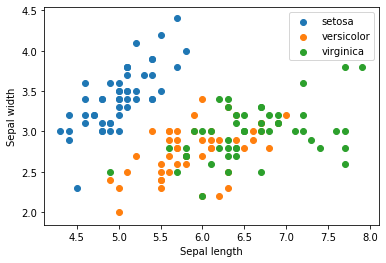

In [48]:
X = iris.data[:, :]
y = iris.target_names[iris.target]

for name in iris.target_names:
    plt.scatter(X[y == name, 0], X[y == name, 1], label=name)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()

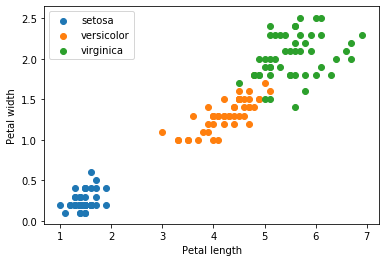

In [49]:
for name in iris.target_names:
    plt.scatter(X[y == name, 2], X[y == name, 3], label=name)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()

In [50]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2)
X_transformed = model.fit_transform(X)

In [51]:
print(X.shape, X_transformed.shape)

(150, 4) (150, 2)


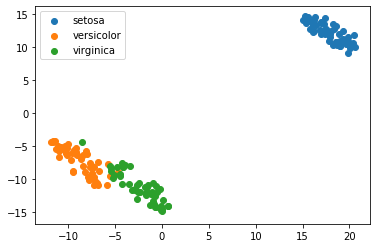

In [52]:
for name in iris.target_names:
    plt.scatter(X_transformed[y == name, 0], X_transformed[y == name, 1], label=name)

plt.legend()

Lets take a look at the breast cancer dataset with dimensionality reduction

In [53]:
X = bc.data
y = bc.target_names[bc.target]
model = TSNE(n_components=2)
X_transformed = model.fit_transform(X)

In [54]:
bc.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

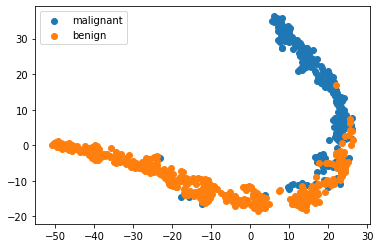

In [55]:
for name in bc.target_names:
    plt.scatter(X_transformed[y == name, 0], X_transformed[y == name, 1], label=name)
plt.legend()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(metrics.classification_report(model.predict(X_test), y_test))

              precision    recall  f1-score   support

      benign       0.94      0.95      0.95        66
   malignant       0.94      0.92      0.93        48

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



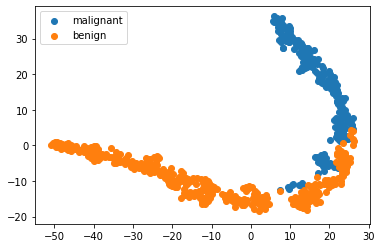

In [57]:
ypred = model.predict(X)
for name in bc.target_names:
    plt.scatter(X_transformed[ypred == name, 0], X_transformed[ypred == name, 1], label=name)
plt.legend()    